## Case Study 2 

There is 1 dataset(csv) with 3 years worth of customer orders. There are 4 columns in the csv dataset:
index, CUSTOMER_EMAIL(unique identifier as hash), Net_Revenue, and Year.

For each year we need the following information:
- Total revenue for the current year
- New Customer Revenue e.g. new customers not present in previous year only
- Existing Customer Growth. To calculate this, use the Revenue of existing customers for current
year –(minus) Revenue of existing customers from the previous year
- Revenue lost from attrition
- Existing Customer Revenue Current Year
- Existing Customer Revenue Prior Year
- Total Customers Current Year
- Total Customers Previous Year
- New Customers
- Lost Customers

Additionally, generate a few unique plots highlighting some information from the dataset. Are there any
interesting observations?

### Import the required libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.colors as mcolors

### Loading the data

In [104]:
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [3]:
orders = pd.read_csv('casestudy.csv')

In [4]:
orders.shape

(685927, 4)

There are 685,927 orders in total and 4 columns: `customer_email, net_revenue, year`

In [5]:
orders.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


We don't need to have the index two times, so we drop the first column 

In [7]:
orders.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
orders.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


We have information for 3 years: 2015, 2016, 2017

In [9]:
orders.net_revenue.describe().round(2)

count    685927.00
mean        125.65
std          71.85
min           1.00
25%          63.51
50%         125.73
75%         187.82
max         250.00
Name: net_revenue, dtype: float64

### Checking for missing values 

In [10]:
orders.isnull().sum()

customer_email    0
net_revenue       0
year              0
dtype: int64

There are no missing values

### For each year:


#### - Total revenue:

In [11]:
total_revenue = orders.groupby("year", as_index=False).sum()
total_revenue

C:\Users\evi_9\AppData\Local\Temp\ipykernel_20224\3133762715.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_revenue = orders.groupby("year", as_index=False).sum()


,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


#### - New Customers 


In [12]:
def new_customer(prev, next):
    oldnew = orders[orders.year.isin({prev, next})] # customers with orders in the years prev and/or next 
    once = oldnew.drop_duplicates('customer_email',keep=False) # customers that made orders only in one of the prev/next year
    new = once[once.year == next]
    return new


In [13]:
new_16 = new_customer(2015,2015)
new_16.head()


,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [14]:
new_17 = new_customer(2016,2017)
new_17.head()


,customer_email,net_revenue,year
435940,mwrossuukz@gmail.com,96.61,2017
435941,qvjfterwnk@gmail.com,176.00,2017
435942,vlyigtgfzs@gmail.com,73.47,2017
435943,yfirychuhk@gmail.com,138.17,2017
435944,fdkiioqtli@gmail.com,156.87,2017


In the `new_16` dataframe, we have all the customers that ordered only in 2016 and not in 2015. There are `145062` new customers.

In the `new_17` dataframe, we have all the customers that ordered only in 2015 and not in 2016. There are `229028` new customers.


#### - Lost Customers

In [15]:
def lost_customer(prev, next):
    oldnew = orders[orders.year.isin({prev, next})] # customers with orders in the years prev and/or next 
    once = oldnew.drop_duplicates('customer_email',keep=False) # customers that made orders only in one of the prev/next year
    lost = once[once.year == prev]
    return lost


In [16]:

lost_15 = lost_customer(2015,2016)
lost_15


,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
231289,xtrpmgjbwp@gmail.com,216.89,2015
231290,peeorxpsbr@gmail.com,39.16,2015
231291,vanasezjpw@gmail.com,233.46,2015
231292,dnpremlztb@gmail.com,136.27,2015


In [17]:
lost_16 = lost_customer(2016,2017)
lost_16


,customer_email,net_revenue,year
231294,mwrossuukz@gmail.com,197.26,2016
231295,gkwsoupawk@gmail.com,38.28,2016
231296,vlyigtgfzs@gmail.com,154.57,2016
231297,yfirychuhk@gmail.com,102.47,2016
231298,trnzgqinuu@gmail.com,32.03,2016
...,...,...,...
435933,sqodpufunf@gmail.com,29.62,2016
435935,mezrjfkced@gmail.com,114.17,2016
435936,rdotspqdxi@gmail.com,169.79,2016
435938,pidugzoeej@gmail.com,116.80,2016


In the `lost_15` dataframe, we have all the customers that ordered in 2015 but did not in 2016. There are `171710 ` lost customers.

In the `lost_16` dataframe, we have all the customers that ordered in 2016 but did not in 2017. There are `183687` new customers.

#### - New Customer Revenue e.g. new customers not present in previous year only


In [18]:
new_revenue_16 = new_16.net_revenue.sum().round(2)
new_revenue_17 = new_17.net_revenue.sum().round(2)

In [19]:
new_revenue_16, new_revenue_17

(29036749.19, 28776235.04)

In the `new_revenue_16` variable, we have the total revenue of the customers that ordered only in 2016 and not in 2015. There is `29036749.19` revenue due to new customers.

In the `new_revenue_17` variable, we have the total revenue of the customers that ordered only in 2017 and not in 2016. There is `28776235.04` revenue due to new customers.

#### - Existing customer growth. 

revenue of existing customers for current year - revenue of existing customers for previous year

In [20]:
def growth(prev, next):
    oldnew = orders[orders.year.isin({prev, next})] # customers with orders in the prev or next years 
    # oldnew.shape
    duplicate =  oldnew[oldnew.duplicated('customer_email',keep=False)] # customers that have made orders in both prev and next years
    # once = oldnew.drop_duplicates('customer_email',keep=False)
    duplicate_prev = duplicate[duplicate.year == prev].set_index(duplicate[duplicate.year == prev].customer_email).sort_index(axis=1)
    duplicate_next = duplicate[duplicate.year == next].set_index(duplicate[duplicate.year == next].customer_email).sort_index(axis=1)
    growth = duplicate_next.net_revenue.subtract(duplicate_prev.net_revenue)
    return growth

In [21]:
growth_16 = growth(2015,2016)
growth_16.name = 'growth_for_16'
growth_17 = growth(2016,2017)
growth_17.name = 'growth_for_17'
growths = pd.concat([growth_16, growth_17], axis=1, copy=False)

In [22]:
merged = orders.merge(growths, how='outer',on='customer_email')

In [23]:
total_growth = merged[['growth_for_16', 'growth_for_17']].sum()
total_growth

growth_for_16    40336.44
growth_for_17    33082.61
dtype: float64

In [24]:
growths.sum()

growth_for_16    20335.46
growth_for_17    20611.34
dtype: float64

In the `growth_16` we have the difference in revenue for customers from 2015 to 2016.

In the `growth_17` we have the difference in revenue for customers from 2016 to 2017.

`merged` is the new dataframe containing two new columns `growth 16, growth 17` with the growth information for period `2015-2016` and `2016-2017` respectively

#### - Revenue lost from attrition

We focus on the customers that were lost from one year to the other

In [25]:
def attrition_loss(prev, next):
    prev_rev = orders[orders.year == prev].net_revenue.sum()
    oldnew = orders[orders.year.isin({prev, next})] # customers with orders in the prev or next years 
    duplicate =  oldnew[oldnew.duplicated('customer_email',keep=False)] # customers that have made orders in both prev and next years
    stable_rev = duplicate[duplicate.year == next].net_revenue.sum()
    loss = (prev_rev - stable_rev).round(2)
    return loss 


In [26]:
loss_16 = attrition_loss(2015,2016)
loss_16

21551296.61

In [27]:
loss_17 = attrition_loss(2016,2017)
loss_17

23089683.6

`loss_16` is the calculated revenue loss due to attrition  (customers lost) from 2015 to 2016

`loss_17` is the calculated revenue loss due to attrition  (customers lost) from 2016 to 2017


#### - Existing customer revenue current year 

In [28]:
def rev_current_year(year):
    revenue = orders[orders.year == year].net_revenue.sum()
    return revenue

In [29]:
orders[orders.year == 2015].net_revenue

0         249.92
1          87.61
2         168.38
3          62.40
4          43.08
           ...  
231289    216.89
231290     39.16
231291    233.46
231292    136.27
231293     60.24
Name: net_revenue, Length: 231294, dtype: float64

In [30]:
rev_15 = rev_current_year(2015)
rev_15

29036749.189999994

#### - Total Customers for each year

In [31]:
total_customers = orders.groupby("year").customer_email.count()
total_customers

year
2015    231294
2016    204646
2017    249987
Name: customer_email, dtype: int64

### Visualizing some information

In [32]:
total_revenue

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


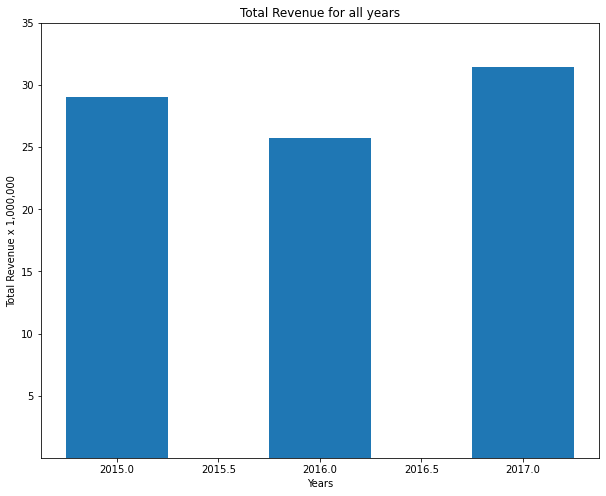

In [105]:
# y = np.linspace(0,35000000,)
plt.figure(figsize = (10,8)) 
plt.bar([2015, 2016, 2017], total_revenue.net_revenue, width=0.5)
# plt.xticks(['15', '16', '17'] ,['15', '16', '17'])
plt.yticks([5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000], ['5','10', '15', '20', '25', '30', '35'])
plt.xlabel('Years')
plt.ylabel('Total Revenue x 1,000,000')
plt.title('Total Revenue for all years')
plt.show()

In [51]:
growths_info = growths.describe()
growths_info['mean_info'] = growths_info.apply(lambda row: row.mean(), axis=1)

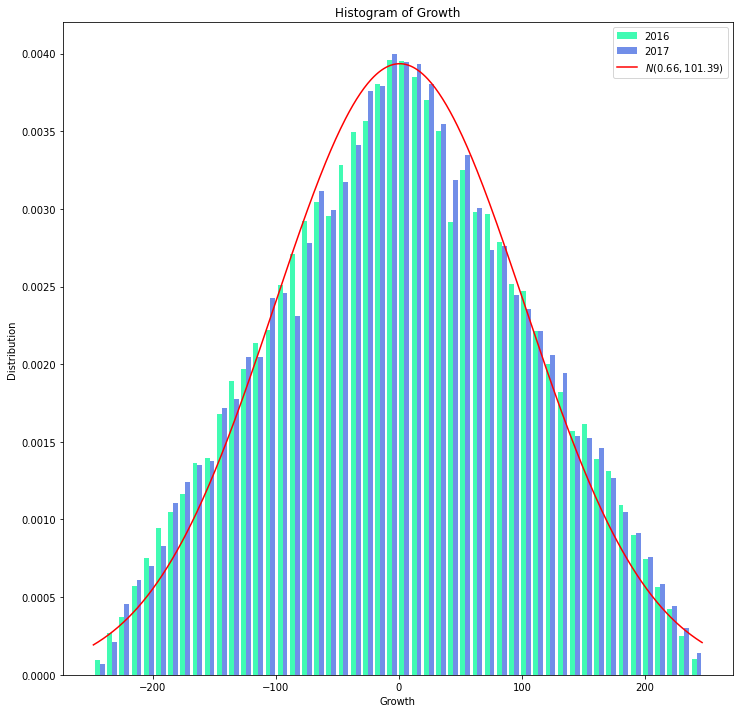

In [106]:
mu = growths_info.mean_info[1].round(2)
sigma = growths_info.mean_info[2].round(2)
min = growths_info.mean_info[3].round(2)
max = growths_info.mean_info[7].round(2)
x_axis = np.arange(min, max, 1)

plt.figure(figsize=(12,12))
plt.hist([growths.growth_for_16.round(),growths.growth_for_17.round()], bins=50, density=True, label=['2016','2017'], alpha=0.75, color=['mediumspringgreen', 'royalblue'])
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma), c='r', label='$N(0.66, 101.39)$')
plt.xlabel('Growth')
plt.ylabel('Distribution')
plt.title('Histogram of Growth')
plt.legend(loc='upper right')
plt.show()

The distribution of growth for both year periods is normal, with `mean = 0`, and `std = 101`